In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sentimentdataset.csv")
cols = ['Text', 'Sentiment', 'Timestamp', 'Likes', 'Retweets', 'Hashtags', 'Platform', 'Country']
df = df[cols]

## Data Overview

In [3]:
df

,Text,Sentiment,Timestamp,Likes,Retweets,Hashtags,Platform,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,30.0,15.0,#Nature #Park,Twitter,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,10.0,5.0,#Traffic #Morning,Twitter,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,40.0,20.0,#Fitness #Workout,Instagram,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,15.0,8.0,#Travel #Adventure,Facebook,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,25.0,12.0,#Cooking #Food,Instagram,Australia
...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,39.0,20.0,#ScienceFairWinner #HighSchoolScience,Facebook,UK
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,48.0,25.0,#SurpriseCelebration #HighSchoolFriendship,Instagram,USA
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,42.0,22.0,#CommunityGiving #HighSchoolPhilanthropy,Twitter,Canada
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,43.0,21.0,#CulturalCelebration #HighSchoolUnity,Facebook,UK


In [4]:
df.shape

(732, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   Likes      732 non-null    float64
 4   Retweets   732 non-null    float64
 5   Hashtags   732 non-null    object 
 6   Platform   732 non-null    object 
 7   Country    732 non-null    object 
dtypes: float64(2), object(6)
memory usage: 45.9+ KB


In [6]:
print(df.describe(include='all'))

                                                     Text    Sentiment  \
count                                                 732          732   
unique                                                707          279   
top      A compassionate rain, tears of empathy fallin...   Positive     
freq                                                    3           44   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                  Timestamp       Likes    Retweets  \
count                   732  732.000000  732.000000   
u

## Sample Data

In [7]:
print(df.head())

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp  Likes  Retweets  \
0  2023-01-15 12:30:00   30.0      15.0   
1  2023-01-15 08:45:00   10.0       5.0   
2  2023-01-15 15:45:00   40.0      20.0   
3  2023-01-15 18:20:00   15.0       8.0   
4  2023-01-15 19:55:00   25.0      12.0   

                                     Hashtags     Platform       Country  
0   #Nature #Park                                Twitter       USA        
1   #Traffic #Morning                            Twitter       Canada     
2   #Fitness #Workout                           Instagram    USA          
3   #Travel #Adventure    

## Missing Values

In [8]:
print(df.isnull().sum())

Text         0
Sentiment    0
Timestamp    0
Likes        0
Retweets     0
Hashtags     0
Platform     0
Country      0
dtype: int64


## Data Types & Non-Null Counts

In [9]:
pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum()
})

,Data Type,Non-Null Count,Missing Count
Text,object,732,0
Sentiment,object,732,0
Timestamp,object,732,0
Likes,float64,732,0
Retweets,float64,732,0
Hashtags,object,732,0
Platform,object,732,0
Country,object,732,0


In [10]:
summary = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum().values,
    'Missing Count': df.isnull().sum().values,
    'Data Type': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

summary = summary.sort_values('Missing Count', ascending=False)
display(summary)

,Column,Non-Null Count,Missing Count,Data Type,Unique Values
0,Text,732,0,object,707
1,Sentiment,732,0,object,279
2,Timestamp,732,0,object,683
3,Likes,732,0,float64,38
4,Retweets,732,0,float64,26
5,Hashtags,732,0,object,697
6,Platform,732,0,object,4
7,Country,732,0,object,115


## Visualization

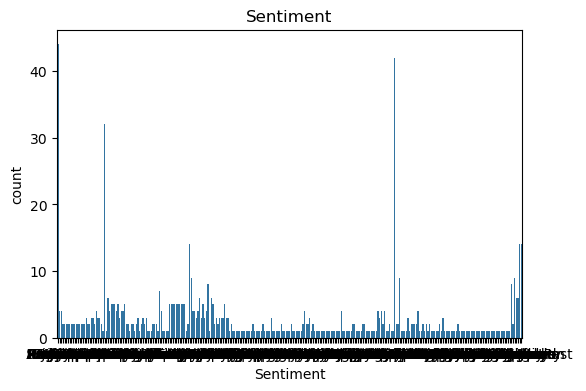

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment")
plt.show()

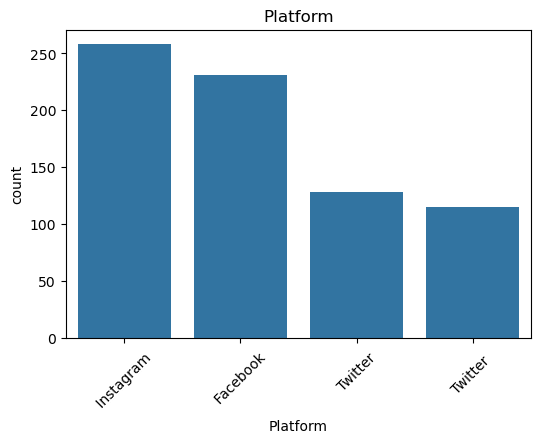

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Platform', data=df, order=df['Platform'].value_counts().index)
plt.title("Platform")
plt.xticks(rotation=45)
plt.show()

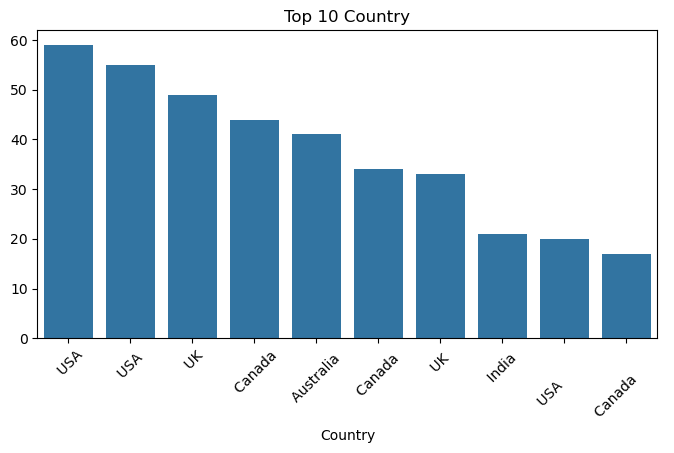

In [13]:
plt.figure(figsize=(8,4))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Country")
plt.xticks(rotation=45)
plt.show()

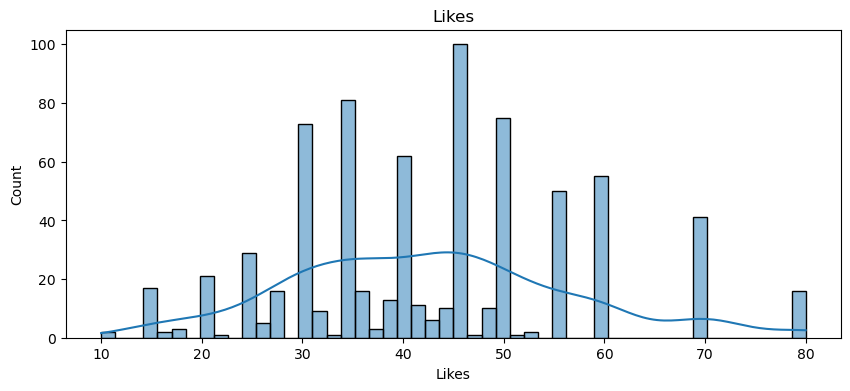

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(df['Likes'].dropna(), bins=50, kde=True)
plt.title("Likes")
plt.show()

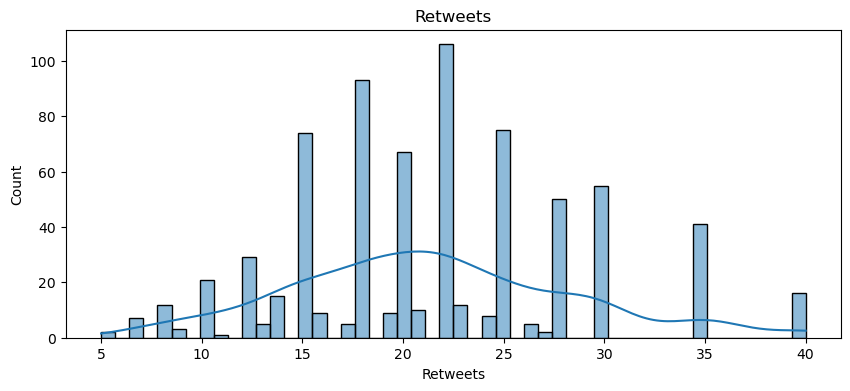

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(df['Retweets'].dropna(), bins=50, kde=True)
plt.title("Retweets")
plt.show()

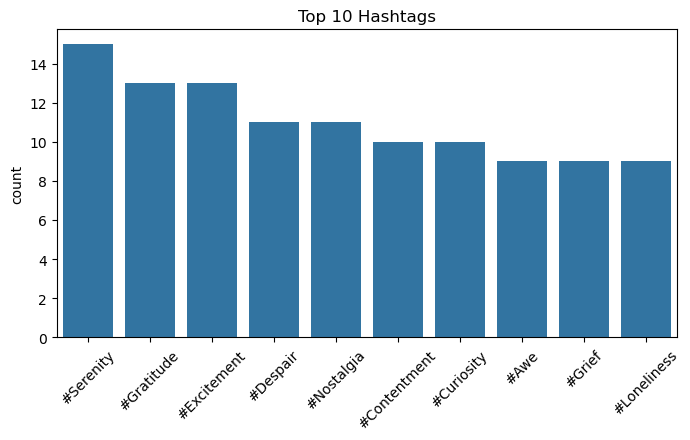

In [26]:
from collections import Counter
import re

hashtag_list = df['Hashtags'].dropna().astype(str).tolist()
all_tags = []
for entry in hashtag_list:
    tags = re.findall(r"#\w+", entry)
    all_tags.extend(tags)

top_tags = Counter(all_tags).most_common(10)
tags, counts = zip(*top_tags)

plt.figure(figsize=(8,4))
sns.barplot(x=list(tags), y=list(counts))
plt.title("Top 10 Hashtags")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()